In [1]:
import pandas as pd
import numpy as np
import nltk
import re

nltk.download("stopwords")

from nltk.corpus import stopwords
from string import punctuation
from nltk import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('russian'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('dataset_v3.csv')
df

,text,class,sequence_length,text_tokens
0,кронштадте присутствии медведева освятили морс...,religion,429,"['кронштадт', 'присутствие', 'медведев', 'освя..."
1,аугсбурге пройдет международный конгресс христ...,religion,157,"['аугсбург', 'пройти', 'международный', 'конгр..."
2,макака джунглях индонзеии украла англичанина к...,world,139,"['макака', 'джунгли', 'индонзеие', 'украсть', ..."
3,берлин увидел российский след кибератаке обсе ...,world,128,"['берлин', 'увидеть', 'российский', 'след', 'к..."
4,верховный суд рф вс дал право контролирующим д...,economy,458,"['верховный', 'суд', 'рф', 'вс', 'дать', 'прав..."
...,...,...,...,...
231243,режиссеру кода доступа кейптаун предложили фил...,science,139,"['режиссёр', 'код', 'доступ', 'кейптаун', 'пре..."
231244,сша восстановят неприступную плавучую крепость...,science,199,"['сша', 'восстановить', 'неприступный', 'плаву..."
231245,президент россии владимир путин видит основани...,society,184,"['президент', 'россия', 'владимир', 'путин', '..."
231246,цик рф утвердил результаты общероссийского гол...,politics,129,"['цик', 'рф', 'утвердить', 'результат', 'общер..."


In [3]:
df = df.drop_duplicates(subset=['text'], keep='first')

In [4]:
df['class'].value_counts()

world       44897
politics    44861
society     44720
science     41642
economy     24553
religion    16682
culture     13893
Name: class, dtype: int64

In [5]:

classes_to_keep = ['world', 'society', 'politics', 'science', 'economy', 'culture', 'religion']

df = df[df['class'].isin(classes_to_keep)]

df = df.groupby('class').sample(n=13893, random_state=1)

df = df.reset_index(drop=True)

In [6]:
pd.DataFrame(df['class'].value_counts())

,class
culture,13893
economy,13893
politics,13893
religion,13893
science,13893
society,13893
world,13893


In [7]:
import re
from multiprocessing import Pool, cpu_count

import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from pymorphy2 import MorphAnalyzer
from tqdm.notebook import tqdm

stop_words = set(stopwords.words("russian"))
morph = MorphAnalyzer()


def process_sentence(sentence):
    tokens = preprocess_text(sentence)
    return tokens


def tokenize_text2words_ru(text):
    sentences = sent_tokenize(text, "russian")
    return sentences


def parallel_preprocess(text_list):
    sentences = [tokenize_text2words_ru(text) for text in text_list]
    with Pool(cpu_count()) as pool:
        result = list(
            tqdm(
                pool.imap(
                    process_sentence,
                    [' '.join(text) for text in sentences],
                ),
                total=len(sentences),
                # sum(len(s) for s in sentences)
            )
        )
    return result

In [8]:
data_main_text = df['text']
df['preprocess_lemm'] = parallel_preprocess(data_main_text)

  0%|          | 0/97251 [00:00<?, ?it/s]

In [9]:
df['preprocess_lemm']

0        [мастер, культура, написать, медведев, путин, ...
1        [суд, новый, зеландия, приговорить, 61летний, ...
2        [онлайнкинотеатр, premierone, показывать, сери...
3        [65летний, народный, артист, россия, борис, ще...
4        [рамка, филармонический, цикл, история, оркест...
                               ...                        
97246    [завал, молл, westgate, находиться, тело, терр...
97247    [семейный, бизнес, президент, сша, дональд, тр...
97248    [последний, грузовой, корабль, прогресс, серия...
97249    [премьер, бельгия, отказаться, вести, перегово...
97250    [сша, поддержать, проведение, переговоры, сири...
Name: preprocess_lemm, Length: 97251, dtype: object

In [10]:
df['sequence_length'] = df['preprocess_lemm'].map(len)

In [11]:
df['sequence_length'].describe()

count    97251.000000
mean       297.788773
std        282.304339
min        100.000000
25%        142.000000
50%        200.000000
75%        359.000000
max      15447.000000
Name: sequence_length, dtype: float64

In [12]:
df['text_tokens'] = df['preprocess_lemm']

In [13]:
df['text_tokens']

0        [мастер, культура, написать, медведев, путин, ...
1        [суд, новый, зеландия, приговорить, 61летний, ...
2        [онлайнкинотеатр, premierone, показывать, сери...
3        [65летний, народный, артист, россия, борис, ще...
4        [рамка, филармонический, цикл, история, оркест...
                               ...                        
97246    [завал, молл, westgate, находиться, тело, терр...
97247    [семейный, бизнес, президент, сша, дональд, тр...
97248    [последний, грузовой, корабль, прогресс, серия...
97249    [премьер, бельгия, отказаться, вести, перегово...
97250    [сша, поддержать, проведение, переговоры, сири...
Name: text_tokens, Length: 97251, dtype: object

In [14]:
df_sorted = df.sort_values('sequence_length').head(20000)
df_sorted[['text_tokens', 'class', 'sequence_length']]

,text_tokens,class,sequence_length
74878,"[максаков, решить, перенести, посвятить, убиты...",society,100
88667,"[вицепрезидент, сша, ноябрь, приехать, украина...",world,100
17917,"[правительство, внести, проект, постановление,...",economy,100
8464,"[умереть, героиня, фильм, к, мухтар, самый, из...",culture,100
51988,"[православный, россия, отмечать, троицкий, род...",religion,100
...,...,...,...
94105,"[правительство, франция, принять, решение, нап...",world,134
71317,"[уполномоченный, право, человек, россия, татья...",society,134
32194,"[прокуратура, запретить, майор, гибдд, миритьс...",politics,134
65315,"[iphone, появиться, новый, система, защита, ap...",science,134


In [15]:
from gensim.models import Word2Vec
import multiprocessing
num_cores = multiprocessing.cpu_count()
# Word2Vec
w2v_model = Word2Vec(df['text_tokens'], vector_size=360, window=10, min_count=5, workers=num_cores, sg=1, 
    sample=0.0001)
word_vectors = w2v_model.wv
w2v_model.save('word2vec_lemm_270.model')

In [16]:
len(word_vectors)

118508

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['text_string'] = df['text_tokens'].apply(' '.join)

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df = 5, max_features = 500000, max_df=0.85)
X_tfidf = vectorizer.fit_transform(df['text_string'])

In [18]:
import numpy as np
from multiprocessing import Pool, cpu_count
from tqdm.notebook import tqdm

def compute_document_vector(args):
    word2vec_model, doc = args
    return document_vector(word2vec_model, doc)

def document_vector(word2vec_model, doc):
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    if not doc:  
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model.wv[doc], axis=0)

def parallel_document_vectors(word2vec_model, docs):
    with Pool(cpu_count()) as pool:
        args = [(word2vec_model, doc) for doc in docs]
        result = list(tqdm(pool.imap(compute_document_vector, args, chunksize=100), total=len(docs)))
    return np.array(result)


# X_w2v = parallel_document_vectors(w2v_model, df['text_tokens'])

# Превращение X_w2v в CSV
X_w2v = pd.read_csv('X_w2v.csv')

# Линейная регрессия с word2vec

In [19]:
labels = df['class']
labels
from sklearn.linear_model import LogisticRegression

In [20]:
import pandas as pd

df_X_w2v = pd.DataFrame(X_w2v)
df_X_w2v.to_csv('X_w2v.csv', index=False)

print("CSV файл успешно создан!")

CSV файл успешно создан!


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.3, random_state=42)
regressor_w2v = LogisticRegression(max_iter=10000000, multi_class='multinomial')
regressor_w2v.fit(X_train, y_train)

LogisticRegression(max_iter=10000000, multi_class='multinomial')

F-score: 0.8236420203436172
Accuracy: 0.8253701672607623


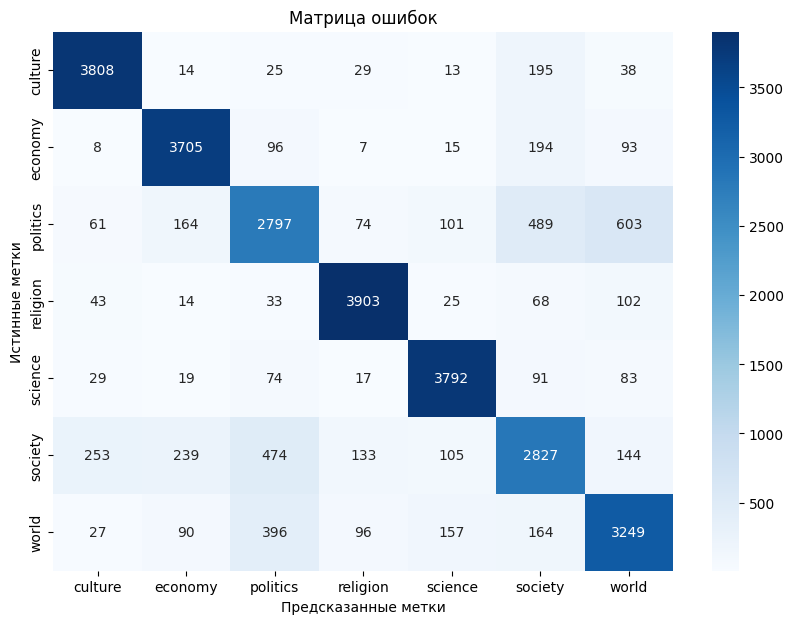

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

y_pred_w2v = regressor_w2v.predict(X_test)


f_score = f1_score(y_test, y_pred_w2v, average='weighted')
accuracy_w2v = accuracy_score(y_test, y_pred_w2v)
conf_matrix = confusion_matrix(y_test, y_pred_w2v)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


In [24]:
print(classification_report(y_test, y_pred_w2v, target_names=encoder.classes_))

              precision    recall  f1-score   support

     culture       0.90      0.92      0.91      4122
     economy       0.87      0.90      0.89      4118
    politics       0.72      0.65      0.68      4289
    religion       0.92      0.93      0.92      4188
     science       0.90      0.92      0.91      4105
     society       0.70      0.68      0.69      4175
       world       0.75      0.78      0.77      4179

    accuracy                           0.83     29176
   macro avg       0.82      0.83      0.82     29176
weighted avg       0.82      0.83      0.82     29176



# Линейная регрессия с tf-idf

In [25]:
X_tfidf

<97251x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 30043672 stored elements in Compressed Sparse Row format>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
regressor_tfidf = LogisticRegression(max_iter=1000000, multi_class='multinomial')
regressor_tfidf.fit(X_train, y_train)

LogisticRegression(max_iter=1000000, multi_class='multinomial')

In [27]:
y_pred_tfidf = regressor_tfidf.predict(X_test)

F-score: 0.8542563824459343
Accuracy: 0.8550717186777029


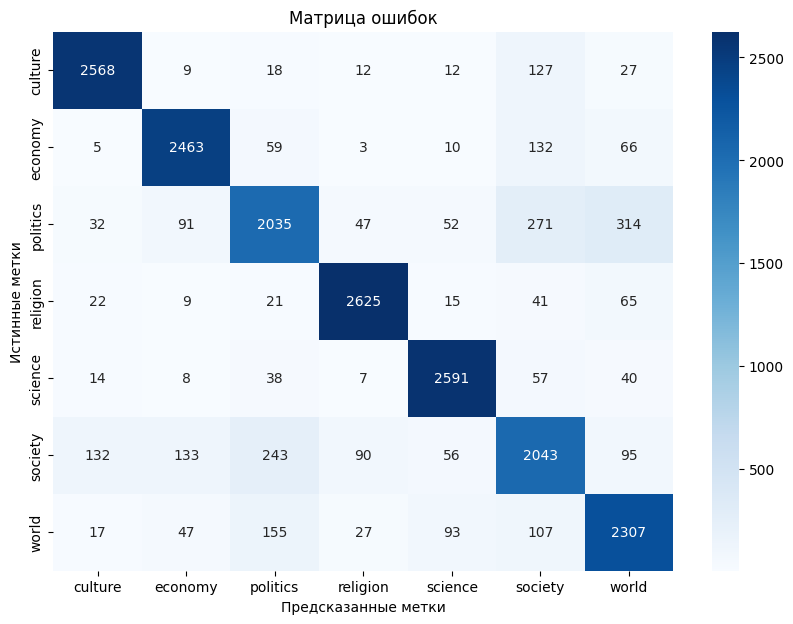

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize



f_score = f1_score(y_test, y_pred_tfidf, average='weighted')
accuracy_w2v = accuracy_score(y_test, y_pred_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred_tfidf)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


In [29]:
print(classification_report(y_test, y_pred_tfidf, target_names=encoder.classes_))

              precision    recall  f1-score   support

     culture       0.92      0.93      0.92      2773
     economy       0.89      0.90      0.90      2738
    politics       0.79      0.72      0.75      2842
    religion       0.93      0.94      0.94      2798
     science       0.92      0.94      0.93      2755
     society       0.74      0.73      0.73      2792
       world       0.79      0.84      0.81      2753

    accuracy                           0.86     19451
   macro avg       0.85      0.86      0.85     19451
weighted avg       0.85      0.86      0.85     19451



# Метод опорных векторов с w2v

In [30]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)
svm_tfidf = LinearSVC(max_iter=1000000)
svm_tfidf.fit(X_train, y_train)



LinearSVC(max_iter=1000000)

F-score: 0.8244135308061928
Accuracy: 0.8277209397974398


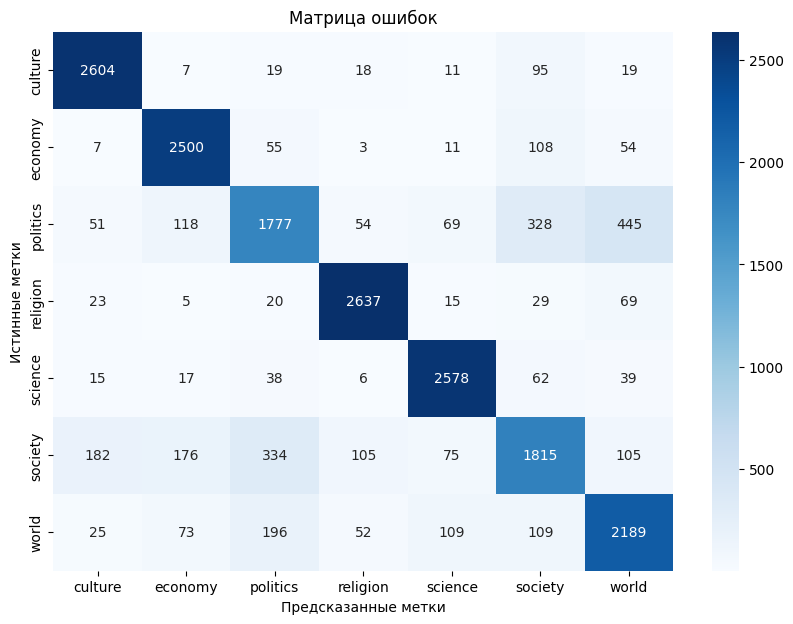

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

y_pred_tfidf = svm_tfidf.predict(X_test)

f_score = f1_score(y_test, y_pred_tfidf, average='weighted')
accuracy_w2v = accuracy_score(y_test, y_pred_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred_tfidf)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


In [32]:
print(classification_report(y_test, y_pred_tfidf, target_names=encoder.classes_))

              precision    recall  f1-score   support

     culture       0.90      0.94      0.92      2773
     economy       0.86      0.91      0.89      2738
    politics       0.73      0.63      0.67      2842
    religion       0.92      0.94      0.93      2798
     science       0.90      0.94      0.92      2755
     society       0.71      0.65      0.68      2792
       world       0.75      0.80      0.77      2753

    accuracy                           0.83     19451
   macro avg       0.82      0.83      0.83     19451
weighted avg       0.82      0.83      0.82     19451



# Метод опорных векторов с TF-IDF

In [33]:
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('svm', LinearSVC(max_iter=10000))  # Увеличиваем количество итераций
])


In [34]:

pipeline.fit(X_train, y_train)

Pipeline(steps=[('svm', LinearSVC(max_iter=10000))])

In [35]:
y_pred_tfidf = pipeline.predict(X_test)

F-score: 0.8671411152130136
Accuracy: 0.8685414631638476


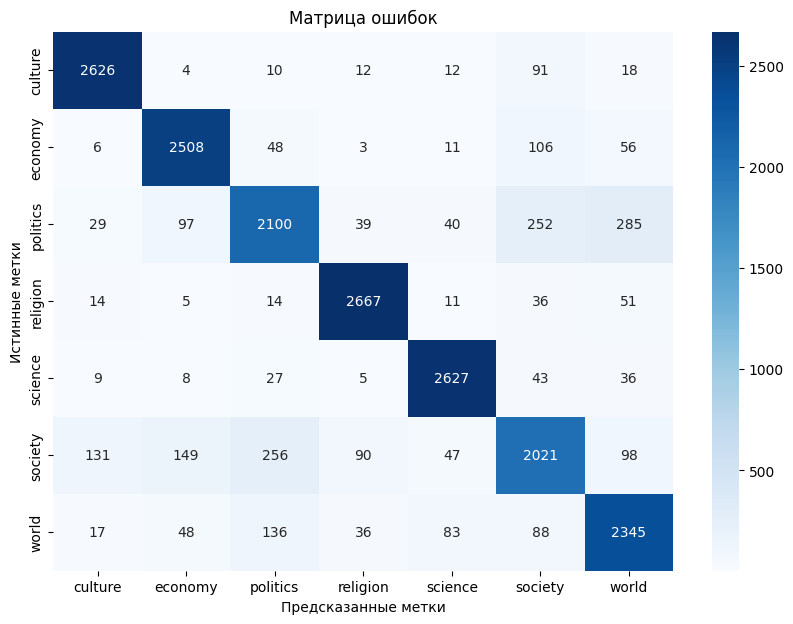

In [36]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize


f_score = f1_score(y_test, y_pred_tfidf, average='weighted')
accuracy_w2v = accuracy_score(y_test, y_pred_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred_tfidf)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


In [37]:
print(classification_report(y_test, y_pred_tfidf, target_names=encoder.classes_))

              precision    recall  f1-score   support

     culture       0.93      0.95      0.94      2773
     economy       0.89      0.92      0.90      2738
    politics       0.81      0.74      0.77      2842
    religion       0.94      0.95      0.94      2798
     science       0.93      0.95      0.94      2755
     society       0.77      0.72      0.74      2792
       world       0.81      0.85      0.83      2753

    accuracy                           0.87     19451
   macro avg       0.87      0.87      0.87     19451
weighted avg       0.87      0.87      0.87     19451



# Метод К-ближайших соседей с w2v

In [38]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)
nb = KNeighborsClassifier()
nb.fit(X_train, y_train)


KNeighborsClassifier()

In [39]:
y_pred_tfidf = nb.predict(X_test)


F-score: 0.8118864359502505
Accuracy: 0.8156907099892037


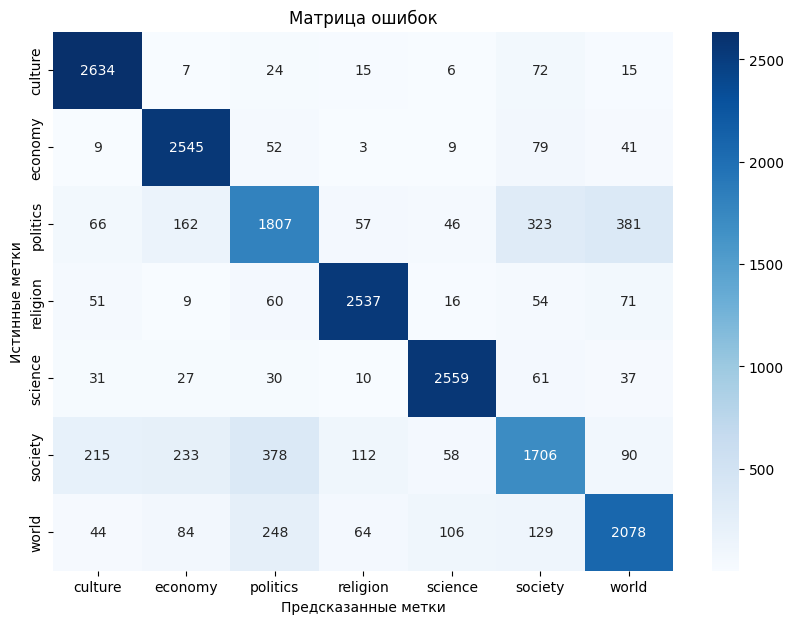

In [40]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize


f_score = f1_score(y_test, y_pred_tfidf, average='weighted')
accuracy_w2v = accuracy_score(y_test, y_pred_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred_tfidf)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


In [41]:
print(classification_report(y_test, y_pred_tfidf, target_names=encoder.classes_))

              precision    recall  f1-score   support

     culture       0.86      0.95      0.90      2773
     economy       0.83      0.93      0.88      2738
    politics       0.70      0.64      0.66      2842
    religion       0.91      0.91      0.91      2798
     science       0.91      0.93      0.92      2755
     society       0.70      0.61      0.65      2792
       world       0.77      0.75      0.76      2753

    accuracy                           0.82     19451
   macro avg       0.81      0.82      0.81     19451
weighted avg       0.81      0.82      0.81     19451



# Метод К-ближайших соседей с TF-IDF

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

nb = MultinomialNB()


param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}


grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)


Best Parameters: {'alpha': 0.1}
Best Cross-validation Accuracy: 0.8225706940874036


In [43]:
y_pred_tfidf = grid_search.predict(X_test)


F-score: 0.8141091767588507
Accuracy: 0.818158449437047


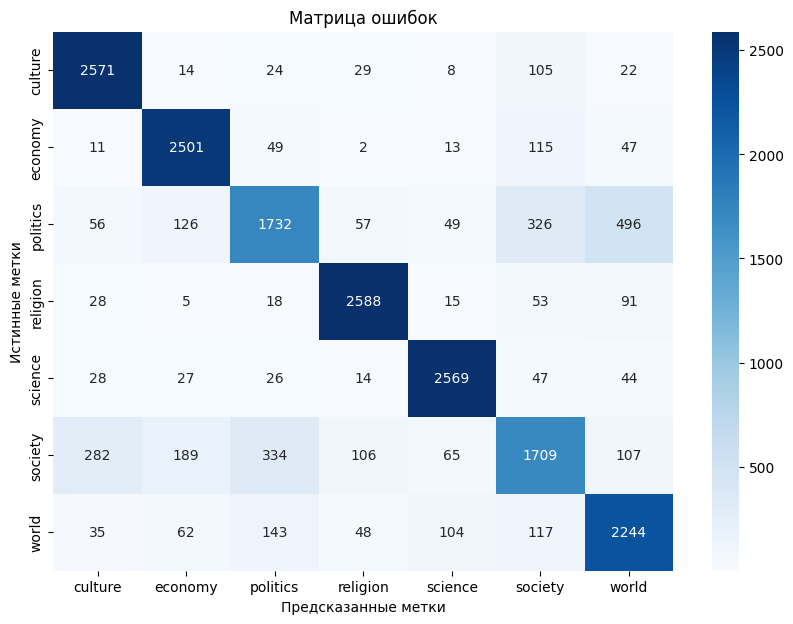

In [44]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize


f_score = f1_score(y_test, y_pred_tfidf, average='weighted')
accuracy_w2v = accuracy_score(y_test, y_pred_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred_tfidf)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


In [45]:
print(classification_report(y_test, y_pred_tfidf, target_names=encoder.classes_))

              precision    recall  f1-score   support

     culture       0.85      0.93      0.89      2773
     economy       0.86      0.91      0.88      2738
    politics       0.74      0.61      0.67      2842
    religion       0.91      0.92      0.92      2798
     science       0.91      0.93      0.92      2755
     society       0.69      0.61      0.65      2792
       world       0.74      0.82      0.77      2753

    accuracy                           0.82     19451
   macro avg       0.81      0.82      0.81     19451
weighted avg       0.81      0.82      0.81     19451



# DENSE с tf-idf

In [47]:
from keras.utils import to_categorical

encoder = LabelEncoder()
y = encoder.fit_transform(df['class'])
y = to_categorical(y)


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

In [56]:
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder

model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(encoder.classes_), activation='softmax', kernel_regularizer=l2(0.001)))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/home/jupyter/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │   256,000,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,165,639 (977.19 MB)

 Trainable params: 256,165,639 (977.19 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model_filename = 'dense7_class.keras'
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,
                           patience=5, verbose=1, mode='auto')
chkpt = ModelCheckpoint(model_filename,
                        monitor='val_loss',
                        verbose=1,
                        save_best_only=True,
                        mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

callbacks = [early_stop, chkpt, rQeduce_lr]

In [58]:
history = model.fit(X_train, y_train,  validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=callbacks)


Epoch 1/10


/home/jupyter/.local/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 256000000 elements. This may consume a large amount of memory.
  warnings.warn(
/home/jupyter/.local/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 256000000 elements. This may consume a large amount of memory.
  warnings.warn(
/home/jupyter/.local/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 256000000 elements. This may consume a large amount of memory.
  warnings.warn(
/home/jupyter/.local/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 256000000 elements. This may consume a large amount of memory.
  warnings.warn(


608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.7064 - loss: 1.0189
Epoch 1: val_loss improved from inf to 0.44746, saving model to dense7_class.keras
608/608 ━━━━━━━━━━━━━━━━━━━━ 323s 529ms/step - accuracy: 0.7066 - loss: 1.0183 - val_accuracy: 0.8669 - val_loss: 0.4475 - learning_rate: 0.0010
Epoch 2/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9649 - loss: 0.1818
Epoch 2: val_loss did not improve from 0.44746
608/608 ━━━━━━━━━━━━━━━━━━━━ 178s 293ms/step - accuracy: 0.9649 - loss: 0.1817 - val_accuracy: 0.8669 - val_loss: 0.5152 - learning_rate: 0.0010
Epoch 3/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9950 - loss: 0.0708
Epoch 3: val_loss did not improve from 0.44746
608/608 ━━━━━━━━━━━━━━━━━━━━ 172s 283ms/step - accuracy: 0.9950 - loss: 0.0708 - val_accuracy: 0.8634 - val_loss: 0.5877 - learning_rate: 0.0010
Epoch 4/10
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.9988 - loss: 0.0461
Epoch 4: val_loss did not improve from 0.44746


In [59]:

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')


Test loss: 0.559
Test accuracy: 0.870


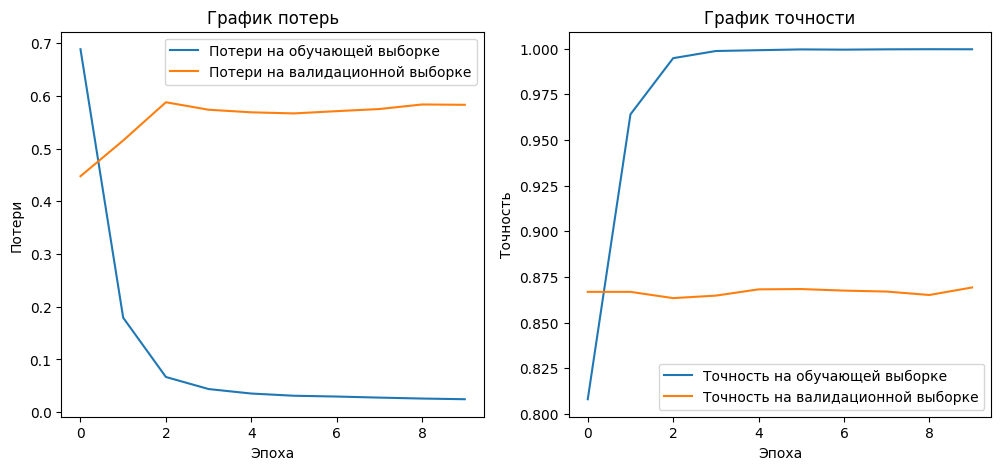

In [60]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.title('График потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.show()

426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
              precision    recall  f1-score   support

     culture       0.91      0.95      0.93      1946
     economy       0.89      0.92      0.90      1917
    politics       0.80      0.77      0.78      2004
    religion       0.93      0.96      0.94      1942
     science       0.93      0.95      0.94      1911
     society       0.79      0.68      0.73      1962
       world       0.83      0.87      0.85      1933

    accuracy                           0.87     13615
   macro avg       0.87      0.87      0.87     13615
weighted avg       0.87      0.87      0.87     13615

F-score: 0.867816869951472
Accuracy: 0.8698494307748806


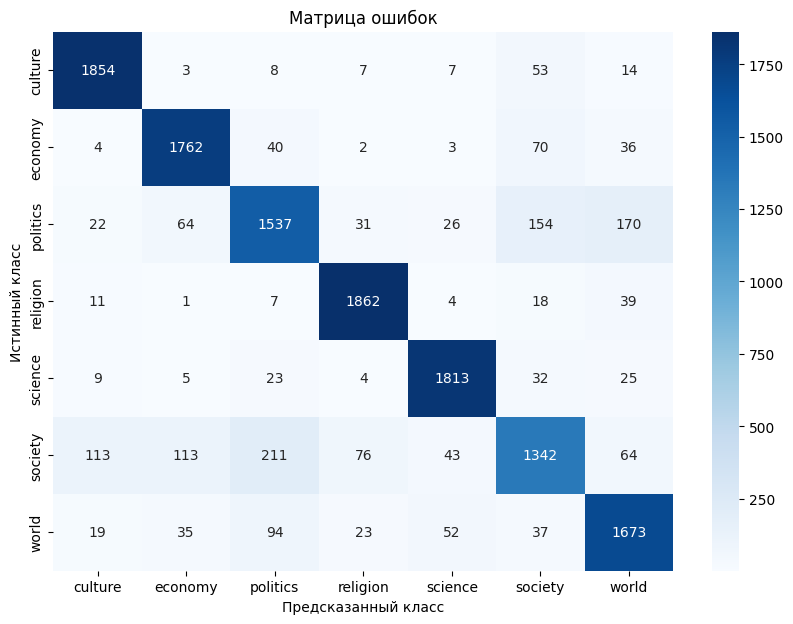

In [61]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true_classes = np.argmax(y_test, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


class_names = encoder.classes_


print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

f_score = f1_score(y_test_classes, y_pred_classes, average='weighted')
accuracy_w2v = accuracy_score(y_test_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

# DENSE с word2vec

In [62]:
from keras.utils import to_categorical

encoder = LabelEncoder()
y = encoder.fit_transform(df['class'])
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)


In [63]:
model_filename = 'dense7_class.keras'
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,
                           patience=5, verbose=1, mode='auto')
chkpt = ModelCheckpoint(model_filename,
                        monitor='val_loss',
                        verbose=1,
                        save_best_only=True,
                        mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

callbacks = [early_stop, chkpt, reduce_lr]

In [64]:
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
import numpy as np


model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))  # Измененный входной слой
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(encoder.classes_), activation='softmax', kernel_regularizer=l2(0.001)))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

/home/jupyter/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       138,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303,879 (1.16 MB)

 Trainable params: 303,879 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit(X_train, y_train,  validation_data=(X_val, y_val), epochs=10, batch_size=64, callbacks=callbacks)


Epoch 1/10
1206/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6495 - loss: 1.1170
Epoch 1: val_loss improved from inf to 0.64015, saving model to dense7_class.keras
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6503 - loss: 1.1146 - val_accuracy: 0.7889 - val_loss: 0.6401 - learning_rate: 0.0010
Epoch 2/10
1213/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7903 - loss: 0.6711
Epoch 2: val_loss improved from 0.64015 to 0.58272, saving model to dense7_class.keras
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7903 - loss: 0.6710 - val_accuracy: 0.8052 - val_loss: 0.5827 - learning_rate: 0.0010
Epoch 3/10
1201/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8083 - loss: 0.6206
Epoch 3: val_loss improved from 0.58272 to 0.55533, saving model to dense7_class.keras
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8083 - loss: 0.6205 - val_accuracy: 0.8228 - val_loss: 0.5553 - learning_rate: 0.0010
Epoch 4/10
1205/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

In [66]:
# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')


Test loss: 0.487
Test accuracy: 0.843


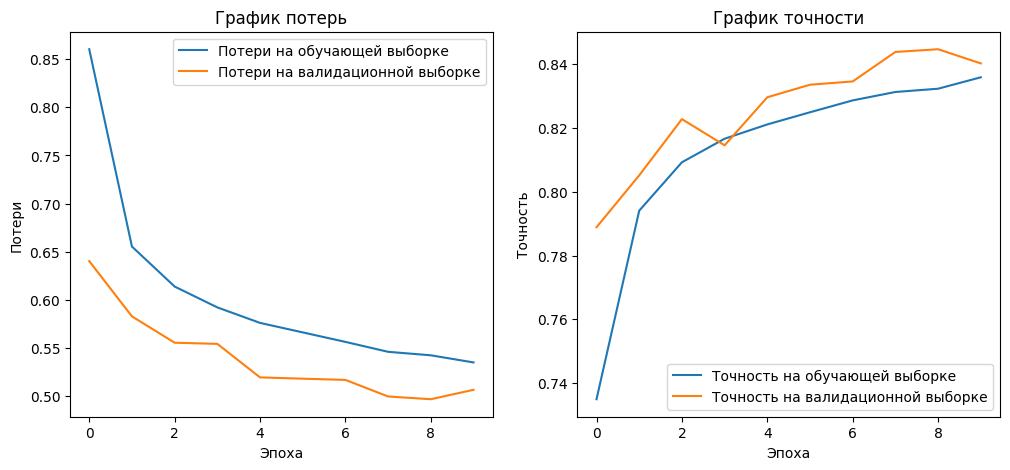

In [67]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.title('График потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.show()

426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

     culture       0.90      0.94      0.92      1946
     economy       0.84      0.94      0.89      1917
    politics       0.75      0.75      0.75      2004
    religion       0.91      0.95      0.93      1942
     science       0.88      0.96      0.91      1911
     society       0.77      0.61      0.68      1962
       world       0.83      0.77      0.80      1933

    accuracy                           0.84     13615
   macro avg       0.84      0.84      0.84     13615
weighted avg       0.84      0.84      0.84     13615

F-score: 0.839339648209237
Accuracy: 0.8434080058758722


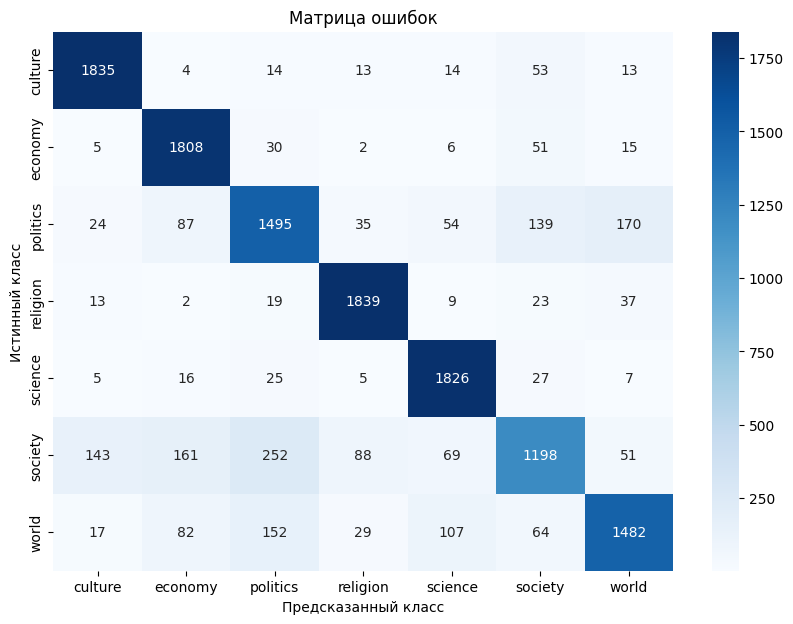

In [68]:

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true_classes = np.argmax(y_test, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


class_names = encoder.classes_


print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

f_score = f1_score(y_test_classes, y_pred_classes, average='weighted')
accuracy_w2v = accuracy_score(y_test_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

# LSTM нейронные сети с word2vec (Матрица эмбединнгов)

In [69]:
import pickle
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
MAX_LEN=360

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text_tokens'])
sequences = tokenizer.texts_to_sequences(df['text_tokens'])
X_tokenizer = pad_sequences(sequences, maxlen=MAX_LEN)

word_index=tokenizer.word_index
print('Уникальные слова:',len(word_index))


Уникальные слова: 636778


In [70]:
vocab_size = len(tokenizer.word_index)+ 1
embedding_matrix = np.zeros((vocab_size, MAX_LEN))
for word, i in tokenizer.word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]

In [71]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['class'])
y = to_categorical(y)


In [72]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [73]:
model_filename = 'dense7_class.keras'
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,
                           patience=5, verbose=1, mode='auto')
chkpt = ModelCheckpoint(model_filename,
                        monitor='val_loss',
                        verbose=1,
                        save_best_only=True,
                        mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

callbacks = [early_stop, chkpt, reduce_lr]

In [74]:

X_train, X_test, y_train, y_test = train_test_split(X_tokenizer, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)
np.shape(X_train)

(77800, 360)

In [75]:
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D, BatchNormalization
from keras.models import Sequential
from keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=MAX_LEN, weights=[embedding_matrix], input_shape=(X_train.shape[1],), trainable=False))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.2)))
model_lstm.add(BatchNormalization())
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(len(encoder.classes_), activation='softmax'))


/home/jupyter/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:

opt = Adam(learning_rate=0.0001)
model_lstm.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 360, 360)       │   229,240,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 360, 360)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       500,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229,783,807 (876.56 MB)

 Trainable params: 542,855 (2.07 MB)

 Non-trainable params: 229,240,952 (874.48 MB)

In [77]:
history = model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=128, callbacks=callbacks)

Epoch 1/15
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.4378 - loss: 1.6175
Epoch 1: val_loss improved from inf to 0.91486, saving model to dense7_class.keras
608/608 ━━━━━━━━━━━━━━━━━━━━ 261s 418ms/step - accuracy: 0.4379 - loss: 1.6171 - val_accuracy: 0.6727 - val_loss: 0.9149 - learning_rate: 0.0010
Epoch 2/15
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.6664 - loss: 0.9986
Epoch 2: val_loss improved from 0.91486 to 0.68325, saving model to dense7_class.keras
608/608 ━━━━━━━━━━━━━━━━━━━━ 252s 414ms/step - accuracy: 0.6665 - loss: 0.9985 - val_accuracy: 0.7462 - val_loss: 0.6832 - learning_rate: 0.0010
Epoch 3/15
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.7315 - loss: 0.8090
Epoch 3: val_loss improved from 0.68325 to 0.58233, saving model to dense7_class.keras
608/608 ━━━━━━━━━━━━━━━━━━━━ 252s 415ms/step - accuracy: 0.7315 - loss: 0.8090 - val_accuracy: 0.7939 - val_loss: 0.5823 - learning_rate: 0.0010
Epoch 4/15
608/608 ━━━━━━━━━━━━━━━━━━━━ 0s 3

In [ ]:
loss, accuracy = model_lstm.evaluate(X_test, y_test, verbose=0)

print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')


In [ ]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.title('График потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.show()

In [ ]:

y_pred = model_lstm.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true_classes = np.argmax(y_test, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

class_names = encoder.classes_

print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

f_score = f1_score(y_test_classes, y_pred_classes, average='weighted')
accuracy_w2v = accuracy_score(y_test_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

print(f"F-score: {f_score}")
print(f"Accuracy: {accuracy_w2v}")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()